## Storytelling Data Visualization on Exchange Rates

In [1]:
import pandas as pd
exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

It can be observed that the data set has a lot of missing values.

### Visualisation of US Dollar/Euro exchange rates

In [2]:
#Renaming columns 
exchange_rates.rename(columns={'[US dollar ]':'US_dollar','Period\\Unit:':'Time'},inplace=True)
exchange_rates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
#Converting the Time column to a datetime object
exchange_rates['Time']=pd.to_datetime(exchange_rates['Time'])

In [4]:
#Sorting by time in ascending order
exchange_rates.sort_values('Time',inplace=True)

In [5]:
exchange_rates.reset_index(drop=True,inplace=True)

In [6]:
#Isolating Euro to dollar conversion data
euro_to_dollar=exchange_rates[['Time','US_dollar']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

A hyphen appears 62 times as an exchange value for USD, which needs to be removed.

In [7]:
euro_to_dollar=euro_to_dollar.loc[~(euro_to_dollar['US_dollar']=='-'),:]
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64

In [8]:
#Converting rate to float
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)

In [9]:
#Calculating rolling mean
euro_to_dollar['rolling_mean']=euro_to_dollar['US_dollar'].rolling(365).mean()

## Impact on US/Euro Exchange Rates due to the September 11 Attack

In [10]:
euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2001) & (euro_to_dollar['Time'].dt.year<=2002)]

,Time,US_dollar,rolling_mean
521,2001-01-02,0.9423,0.959898
522,2001-01-03,0.9530,0.959587
523,2001-01-04,0.9458,0.959262
524,2001-01-05,0.9545,0.958928
525,2001-01-08,0.9497,0.958574
...,...,...,...
1035,2002-12-23,1.0282,0.929687
1036,2002-12-24,1.0296,0.930103
1039,2002-12-27,1.0376,0.930569
1040,2002-12-30,1.0422,0.931039


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style

In [12]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
style.use('seaborn-muted')

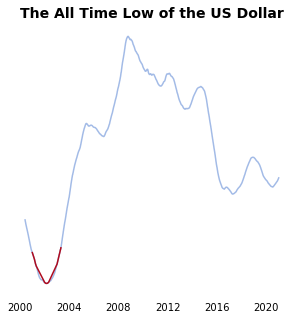

In [14]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'],alpha=0.5)
ax.set_title('The All Time Low of the US Dollar',fontdict={'fontsize': 14,
 'fontweight': 'bold'})
ax.tick_params(left=False,bottom=False)
for loc in ['top','bottom','right','left']:
    ax.spines[loc].set_visible(False)
    
ax.set_yticklabels([])
#dollar_2001_2003=euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2001) & ((euro_to_dollar['Time'].dt.year<=2004)&(euro_to_dollar['Time'].dt.month<=3))]
dollar_2001_2003=euro_to_dollar[((euro_to_dollar['Time'].dt.year>=2001)&(euro_to_dollar['Time'].dt.month>=1))&((euro_to_dollar['Time'].dt.year<=2003)&(euro_to_dollar['Time'].dt.month<=4))]

ax.plot(dollar_2001_2003['Time'],dollar_2001_2003['rolling_mean'],color='#af0b1e')